In [6]:
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:

## load in the heat map data
heat_map_data = 'final_bins_abundace.tsv'
heat_map_df = pd.read_csv(heat_map_data, sep = '\t')
##Change 'Bin Id' to 'bin_name'
heat_map_df.rename({'Bin Id':'bin_name'}, inplace=True, axis = 1)

## change the sr to SR
heat_map_df['bin_name'] = heat_map_df['bin_name'].apply(lambda bin_name: bin_name.replace('sr', 'SR'))
heat_map_df = heat_map_df.set_index('bin_name')

# ## Genrate the heat map here and export it...

# ## Normalization functions

# def col_sum(dataframe):
#     return dataframe.div(dataframe.sum(axis=0), axis=1)

# def log_by_n(dataframe, n ):
#     return np.log((dataframe) * n)

def min_max(dataframe, n):
    return (dataframe-dataframe.min())/(dataframe.max()-dataframe.min()) * n


# ## Data normalisation for heatmap
heat_map_df[heat_map_df < 0.5] = 0
heat_map_df = min_max(heat_map_df, 1)


heat_map_df.rename(index={'SR_bins.25':'MH-Pat_SR_metabat2_bins_bin.25',
                               'SR_bins.5':'MH-Pat_SR_metabat2_bins_bin.5',
                               'SR_cluster_DBSCAN_round1_1':'MH-Pat_SR_autometa_cluster_DBSCAN_round1_1',
                               'SR_cluster_DBSCAN_round2_1':'MH-Pat_SR_autometa_cluster_DBSCAN_round2_1',
                               'SR_cluster_DBSCAN_round3_0':'MH-Pat_SR_autometa_cluster_DBSCAN_round3_0',
                               'SR_cluster_DBSCAN_round4_1':'MH-Pat_SR_autometa_cluster_DBSCAN_round4_1'
                              },inplace=True)


In [8]:
## Spit out the heat_map values 
pd.DataFrame.to_csv(heat_map_df,'heat_map_values.csv')




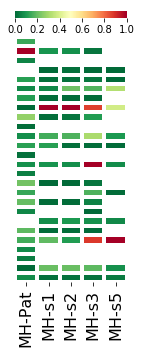

In [9]:
#Rm the index name to an empty string for the plot 
heat_map_df.index.name = ''

#ns.set(font_scale=3)

#ratio of color bar to plot 
grid_kws = {"height_ratios": (.03, 1),  "hspace": 0.15}

# pos of color bar and plot sizes
fig, (cbar_ax, ax) = plt.subplots(2, figsize=(2,5), gridspec_kw=grid_kws)


# heat map plotting 

ax = sns.heatmap(heat_map_df,
                 cmap='RdYlGn_r',
                 ax=ax, 
                 yticklabels=False,
                 mask=heat_map_df==0,
                 linewidths=3,
                 cbar_ax=cbar_ax,
                 
                 cbar_kws={ "orientation": "horizontal", "label":'Abundance'})

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 16)

plt.savefig("heatmap.png")
plt.show()